In [ ]:
# Computing regression parameters using gradient descent

THe idea behind this post is to grok the Algo behind the gradient descent using a trivial example

In [1]:
X=[0,1,2,3,4]
Y=[1,3,7,13,21]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#converting list into pandas dataframe
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)

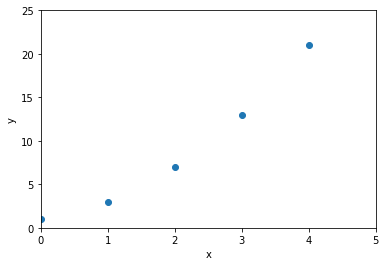

In [4]:
plt.scatter(df_X,df_Y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,25,5)

#plt.axis([0, 1000, 0, 1000])
plt.show()


We are going to find the "best fit" line for the above plot. For this we are going to use  gradient descent. THe idea is to get a firm grasp of Linear Regression

### Derivatives

    The derivative of the cost for the intercept is the sum of the errors
    The derivative of the cost for the slope is the sum of the product of the errors and the input
    
    RSS(w0,w1) = (yi-[w0+w1xi])2 
    
    taking derivate of RSS w.r.t w0 and w1 we get:
    [yi – (w0+w1xi)]       
    [yi – (w0+w1xi)]xi 
    


### The algorithm

Algorithm:  
while not converged  
w(t+1) <-- w(t) - η dg/dw 

1. Compute the predicted values given the current slope and intercept

2. Compute the prediction errors (prediction - Y)

3. Update the intercept:
        a. compute the derivative: sum(errors)
        b. compute the adjustment as step_size times the derivative
        c. decrease the intercept by the adjustment
4. Update the slope:
       a. compute the derivative: sum(errors*input)
       b. compute the adjustment as step_size times the derivative
       c. decrease the slope by the adjustment
       
5. Compute the magnitude of the gradient

6. Check for convergence 

  
       

In [38]:
### FIRST STEP

intercept = 0
slope = 0
predictions= [0,0,0,0,0]
adjustment =0.05

#computing errors
error = [i - j for i, j in zip(predictions, Y)]
#print(error)
#update intercept
intercept = intercept - adjustment * sum(error)

#update slope
derivate_slope = sum([i*j for i,j in zip(error,X)])
slope = slope - adjustment*derivate_slope

print(intercept,slope)
error_magnitude  =((sum(error))**2 + ((derivate_slope)**2))**(0.5)
print("error is =",error_magnitude)


2.25 7.0
error is 147.05441169852742


In [33]:
((sum(error))**2 + ((derivate_slope)**2))**(0.5)

147.05441169852742

We calcluated the slope and intercept of the line and then we measured the error which was greater then our cut off value.
So we will iterate all the steps again . This time the initial value of slope and intercept will be same as we calclated in the FIRST STEP above

In [43]:
#Second step:

intercept = 2.25
slope = 7
predictions = [(slope*i + intercept) for i in X]
print("new proedcition= ",predictions)
error = [i - j for i, j in zip(predictions, Y)]
print("error 2nd pass= ",error)

#update intercept
intercept = intercept - adjustment * sum(error)
#update slope
derivate_slope = sum([i*j for i,j in zip(error,X)])
slope = slope - adjustment*derivate_slope

print(intercept,slope)
error_magnitude  =((sum(error))**2 + ((derivate_slope)**2))**(0.5)
print("error is =",error_magnitude)

new proedcition=  [2.25, 9.25, 16.25, 23.25, 30.25]
error 2nd pass=  [1.25, 6.25, 9.25, 10.25, 9.25]
0.4375 2.375
error is = 99.34944640006808


Since Error in Second step is greater then thresh hold value we will iterate again

In [44]:
#Third Step
intercept = 0.4375
slope = 2.375
predictions = [(slope*i + intercept) for i in X]
print("new proedcition= ",predictions)
error = [i - j for i, j in zip(predictions, Y)]
print("error 2nd pass= ",error)

#update intercept
intercept = intercept - adjustment * sum(error)
#update slope
derivate_slope = sum([i*j for i,j in zip(error,X)])
slope = slope - adjustment*derivate_slope

print(intercept,slope)
error_magnitude  =((sum(error))**2 + ((derivate_slope)**2))**(0.5)
print("error is =",error_magnitude)

new proedcition=  [0.4375, 2.8125, 5.1875, 7.5625, 9.9375]
error 2nd pass=  [-0.5625, -0.1875, -1.8125, -5.4375, -11.0625]
1.390625 5.59375
error is = 67.13806320746824


In [54]:
intercept = 0
slope = 0
adjustment =0.05
tolerance = 0.05
error_magnitude=10
while True:
    
    
    predictions = [(slope*i + intercept) for i in X]
    error = [i - j for i, j in zip(predictions, Y)]
    #update intercept
    intercept = intercept - adjustment * sum(error)
    #update slope
    derivate_slope = sum([i*j for i,j in zip(error,X)])
    slope = slope - adjustment*derivate_slope
    error_magnitude  =((sum(error))**2 + ((derivate_slope)**2))**(0.5)
    if(error_magnitude < tolerance):
        break;

print("slope is=",slope)
print("intercept is =",intercept) 
print("error is =",error_magnitude)
    
    

slope is= 4.9904183559693225
intercept is = -0.9726848324038107
error is = 0.04667687885208575


In [55]:
def my_gradient_descent(tolerance,adjustment,X,Y):
    intercept = 0
    slope = 0
    while True:   
        predictions = [(slope*i + intercept) for i in X]
        error = [i - j for i, j in zip(predictions, Y)]
        #update intercept
        intercept = intercept - adjustment * sum(error)
        #update slope
        derivate_slope = sum([i*j for i,j in zip(error,X)])
        slope = slope - adjustment*derivate_slope
        error_magnitude  =((sum(error))**2 + ((derivate_slope)**2))**(0.5)
        if(error_magnitude < tolerance):
            break;

    print("slope is=",slope)
    print("intercept is =",intercept) 
    print("error is =",error_magnitude)

    
    

In [56]:
my_gradient_descent(0.05,0.05,X,Y)

slope is= 4.9904183559693225
intercept is = -0.9726848324038107
error is = 0.04667687885208575


In [57]:
my_gradient_descent(0.005,0.05,X,Y)

slope is= 4.998988731505006
intercept is = -0.9971170949285223
error is = 0.004926384191452688


In [58]:
my_gradient_descent(0.0005,0.05,X,Y)

slope is= 4.999901231604713
intercept is = -0.9997184329294512
error is = 0.0004811492334274384


As we can see with reducing error slpoe is converging towards 5 and interept towards -1

yi = w0+w1 xi + εi 

Approach 2: Gradient descent 
	[yi – ŷi(w0,w1)]  
    [yi – ŷi(w0,w1)]xi 